In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
data = pd.read_csv("s3://ai-diennea/data/export_wonkit_20210630102441.csv.gz")

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# add the day of the week column
day_of_week = []
for i in range(len(data)):
    day_of_week.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').day_name())
data['day_of_week'] = pd.DataFrame(day_of_week)

In [9]:
# check whether there are click events without relative open
distinct_click = []
for i in range(len(data)):
    if (str(data["EVENT.TYPE"][i]) == 'Click') and (data['HashMessaggio'][i] not in distinct_click):
        distinct_click.append(data['HashMessaggio'][i])

In [10]:
c = 0 # is the number of mails that has click + open event
for i in range(len(distinct_click)):
    for j in range(len(data)):
        if (str(data["EVENT.TYPE"][j]) == 'Open') and (data['HashMessaggio'][j] == distinct_click[i]):
            c += 1
            break

In [12]:
# here I computed that indeed some clicked mails do not have the Open event
len(distinct_click), c

(1550, 1216)

In [13]:
clicked_mails_that_do_not_have_open_event = len(distinct_click) - c

In [14]:
clicked_mails_that_do_not_have_open_event

334

In [4]:
# number of distict opened mails is length of 'list_contact_concatenated_mex'
list_contact_concatenated_mex = []
for i in range(len(data)):
    if (str(data["EVENT.TYPE"][i]) == 'Open') and (data['HashContatto'][i] + data['HashMessaggio'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContatto'][i] + data['HashMessaggio'][i])

In [6]:
len(list_contact_concatenated_mex)

15069

In [15]:
wa = data.loc[data["EVENT.TYPE"] == 'Open']
((len(wa.groupby(['HashMessaggio','HashContatto']).count()) + clicked_mails_that_do_not_have_open_event) / len(data.loc[data["EVENT.TYPE"] == 'Sent'])) * 100

23.72320108427797

In [78]:
len(wa.groupby(['HashMessaggio'])) / len(data.loc[data["EVENT.TYPE"] == 'Sent']) * 100

23.2087851158206

In [37]:
# % clicked mails
wa = data.loc[data["EVENT.TYPE"] == 'Click']
len(wa.groupby(['HashMessaggio','HashContatto']).count()) / len(data.loc[data["EVENT.TYPE"] == 'Sent']) * 100

2.387259733859044

In [38]:
# % unsubscribed mails
wa = data.loc[data["EVENT.TYPE"] == 'Unsubscribe']
len(wa.groupby(['HashMessaggio','HashContatto']).count()) / len(data.loc[data["EVENT.TYPE"] == 'Sent']) * 100

0.2649088220798423

In [39]:
# % complaint mails
wa = data.loc[data["EVENT.TYPE"] == 'Complaint']
len(wa.groupby(['HashMessaggio','HashContatto']).count()) / len(data.loc[data["EVENT.TYPE"] == 'Sent']) * 100

0.006160670280926565

In [169]:
# % email bounced
wa = data.loc[(data["EVENT.TYPE"] == 'Soft Bounce') | (data["EVENT.TYPE"] == 'Hard Bounce')]
(len(data.loc[data["EVENT.TYPE"] == 'Soft Bounce']) + len(data.loc[data["EVENT.TYPE"] == 'Hard Bounce'])) / len(data.loc[data["EVENT.TYPE"] == 'Sent']) * 100

3.8750616067028094

In [107]:
# % distinct opened mails per CAMPAIGN.CAMPAIGN_NAME
dk = {}
for i in data["CAMPAIGN.CAMPAIGN_NAME"].unique():
    dk[i] = 0
list_contact_concatenated_mex = []
for i in range(len(data)):
    if (str(data["EVENT.TYPE"][i]) == 'Open') and (data['HashContatto'][i] + data['HashMessaggio'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContatto'][i] + data['HashMessaggio'][i])
        dk[data["CAMPAIGN.CAMPAIGN_NAME"][i]] += 1

In [61]:
dk

{'tbd': 7786, 'Diennea': 3777, 'MagNews Comunicazioni 2021': 3506}

In [100]:
dk_values_list = list(dk.values())
for i in range(len(dk_values_list)):
    dk_values_list[i] = (dk_values_list[i] / len(list_contact_concatenated_mex)) * 100

In [101]:
dk_values_list

[51.66898931581392, 25.064702369102132, 23.266308315083947]

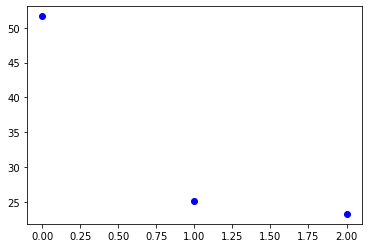

In [103]:
plt.plot(range(0, len(dk_values_list)), dk_values_list, 'bo')
plt.show()

In [53]:
# campaign types
data["CAMPAIGN.CAMPAIGN_NAME"].unique()

array(['tbd', 'Diennea', 'MagNews Comunicazioni 2021'], dtype=object)

In [104]:
# top campaign name
data["CAMPAIGN.CAMPAIGN_NAME"].unique()[np.argmax(dk_values_list)]

'tbd'

In [105]:
# % distinct opened mails per MESSAGE.SUBJECT

dj = {}
for i in data["MESSAGE.SUBJECT"].unique():
    dj[i] = 0
list_contact_concatenated_mex_subj = []
for i in range(len(data)):
    if (str(data["EVENT.TYPE"][i]) == 'Open') and (data['HashContatto'][i] + data['HashMessaggio'][i] not in list_contact_concatenated_mex_subj):
        list_contact_concatenated_mex_subj.append(data['HashContatto'][i] + data['HashMessaggio'][i])
        dj[data["MESSAGE.SUBJECT"][i]] += 1

In [110]:
dj_values_list = list(dj.values())
for i in range(len(dj_values_list)):
    dj_values_list[i] = (dj_values_list[i] / len(list_contact_concatenated_mex_subj)) * 100

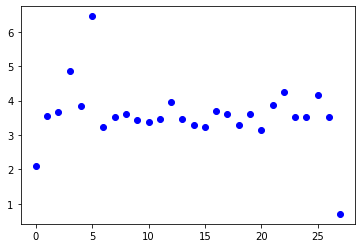

In [111]:
plt.plot(range(0, len(dj_values_list)), dj_values_list, 'bo')
plt.show()

In [116]:
sum(dj_values_list)

100.0

In [117]:
# top 2 MESSAGE.SUBJECT
data["MESSAGE.SUBJECT"].unique()[np.argmax(dj_values_list)], data["MESSAGE.SUBJECT"].unique()[np.argsort(dj_values_list)[-2]]

('Partecipa al webinar sul Privacy Shield',
 'Strategia sul contatto: un nuovo modo di fare business')

In [119]:
# top 2 MESSAGE.SUBJECT %
dj_values_list[np.argmax(dj_values_list)], dj_values_list[np.argsort(dj_values_list)[-2]]

(6.456964629371558, 4.857654787975314)

In [109]:
# check whether EVENT.DATE and MESSAGE_STATISTICS.SENT_TIMESTAMP are the same
print("The dates are the same for all the messages") if len(data.loc[(data["EVENT.DATE"] == data["MESSAGE_STATISTICS.SENT_TIMESTAMP"])]) == data["HashMessaggio"].nunique() else print("The two dates are not the same")

The dates are the same for all the messagges


In [451]:
# check for how many different messagges the dates are not the same
out = len(data.loc[(data["EVENT.DATE"] == data["MESSAGE_STATISTICS.SENT_TIMESTAMP"])]) / len(data)
print("Columns \"EVENT.DATE\" and \"MESSAGE_STATISTICS.SENT_TIMESTAMP\" are the same for the {:.2f} % of the time".format(out*100))

Columns "EVENT.DATE" and "MESSAGE_STATISTICS.SENT_TIMESTAMP" are the same for the 63.49 % of the time


In [463]:
len((data.loc[(data["EVENT.DATE"] == data["MESSAGE_STATISTICS.SENT_TIMESTAMP"])]['EVENT.TYPE']) == 'Sent') == len(data.loc[data["EVENT.TYPE"] == 'Sent'])

True

In [252]:
for i in range(len(data)):
    if "nan" not in str(data["Ultima email aperta dal contatto"][i]) and "nan" not in str(data["Ultima email inviata al contatto"][i]) and pd.to_datetime(data["Ultima email aperta dal contatto"][i], format='%d/%m/%Y %H:%M') > pd.to_datetime(data["Ultima email inviata al contatto"][i], format='%d/%m/%Y %H:%M'):
        print("aperta", data["Ultima email aperta dal contatto"][i])
        print("inviata", data["Ultima email inviata al contatto"][i])
        counter_aperta_greater_than_inviata += 1
    else:
        counter_inviata_greater_than_orequal_aperta += 1


In [253]:
counter_aperta_greater_than_inviata, counter_inviata_greater_than_orequal_aperta

(0, 133602)

In [491]:
# check for inviata <= consegnata 
out = len(data.loc[(data["Ultima email consegnata al contatto"] >= data["Ultima email inviata al contatto"])]) / len(data)
print("Columns \"Ultima email consegnata al contatto\" and \"Ultima email inviata al contatto\" are the same for the {:.2f} % of the time".format(out*100))

Columns "Ultima email consegnata al contatto" and "Ultima email inviata al contatto" are the same for the 96.42 % of the time


In [466]:
# check for inviata > consegnata (should be 0%) 
out = len(data.loc[(data["Ultima email consegnata al contatto"] < data["Ultima email inviata al contatto"])]) / len(data)
print("Columns \"Ultima email consegnata al contatto\" and \"Ultima email inviata al contatto\" are the same for the {:.2f} % of the time".format(out*100))

Columns "Ultima email consegnata al contatto" and "Ultima email inviata al contatto" are the same for the 2.57 % of the time


In [255]:
c = 0
d = 0
f = 0
for i in range(len(data)):
    if "nan" not in str(data["Ultima email consegnata al contatto"][i]) and "nan" not in str(data["Ultima email inviata al contatto"][i]) and pd.to_datetime(data["Ultima email consegnata al contatto"][i], format='%d/%m/%Y %H:%M')  >= pd.to_datetime(data["Ultima email inviata al contatto"][i], format='%d/%m/%Y %H:%M') :
        c += 1
    elif "nan" not in str(data["Ultima email consegnata al contatto"][i]) and "nan" not in str(data["Ultima email inviata al contatto"][i]) and pd.to_datetime(data["Ultima email consegnata al contatto"][i], format='%d/%m/%Y %H:%M')  < pd.to_datetime(data["Ultima email inviata al contatto"][i], format='%d/%m/%Y %H:%M') :
        d += 1
    elif  "nan" not in str(data["Ultima email consegnata al contatto"][i]) or "nan" not in str(data["Ultima email inviata al contatto"][i]):
        f += 1
        print(data["EVENT.TYPE"][i])

Sent
Soft Bounce
Sent
Soft Bounce
Sent
Soft Bounce
Sent
Sent
Soft Bounce
Sent
Sent
Sent
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Sent
Soft Bounce
Sent
Sent
Soft Bounce
Sent
Hard Bounce
Sent
Soft Bounce
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Soft Bounce
Hard Bounce
Soft Bounce
Soft Bounce
Hard Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Sent
Sent
Sent
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Sent
Sent
Sent
Sent
Sent
Soft Bounce
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Soft Bounce
Sent
Sent
Sent
Sent
Sent
Hard Bounce
Soft Bounce
Hard Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Hard Bounce
Hard Bounce
Soft Bounce
Soft Bounce
Hard Bounce
Soft Bounce
Sent
Sent
Sent
Soft Bounce
Soft Bounce
Soft Bounce
Soft Bounce
Hard Bounce
Sent
Soft Bounce
Sent
Soft Bounce
Sent
Soft Bounce
Sent
Soft Bounce
Sent
Soft Bounce
Soft Bounce
Sent
Sent
Sent
Soft Bounce
Soft Bounce
Sent
Sent
Sent
Sent
Sent
Sent
Sent
Sent
S

In [256]:
c / len(data) * 100

94.50425871055437

In [257]:
d / len(data) * 100

4.478735783925446

In [258]:
f / len(data) * 100

1.0170055055201885

**Data ultima mail arrivata** dovrebbe essere la data dell'ultimo messaggio che il contatto ha ricevuto.
Se il messaggio è stato aperto, dovrebbe coincidere con **data ultima mail aperta**, altrimenti la data dell'ultima mail aperta dovrebbe essere più vecchia.
La logica dovrebbe essere "se è aperta, è anche arrivata...non per forza il contrario". <br>
Here I am verifying that _Ultima email aperta dal contatto_ is <= than _Ultima email inviata al contatto_. VERIFIED.

In [260]:
counter_inviata_equals_aperta = len(data.loc[(data["EVENT.TYPE"] == 'Open') & (data["Ultima email aperta dal contatto"] == data["Ultima email inviata al contatto"])])
inviata_greater_than_aperta = len(data.loc[(data["EVENT.TYPE"] == 'Open') & (data["Ultima email aperta dal contatto"] != data["Ultima email inviata al contatto"])])
opened_mails = data.loc[(data["EVENT.TYPE"] == 'Open')]
counter_aperta_greater_than_inviata = 0 # note that this should be zero
counter_inviata_greater_than_orequal_aperta = 0 # note that this should be equal to inviata_greater_than_aperta + counter_inviata_equals_aperta
for i in range(len(opened_mails)):
    if "nan" not in str(data["Ultima email aperta dal contatto"][i]) and "nan" not in str(data["Ultima email inviata al contatto"][i]) and pd.to_datetime(data["Ultima email aperta dal contatto"][i], format='%d/%m/%Y %H:%M') > pd.to_datetime(data["Ultima email inviata al contatto"][i], format='%d/%m/%Y %H:%M'):
        print("aperta", data["Ultima email aperta dal contatto"][i])
        print("inviata", data["Ultima email inviata al contatto"][i])
        counter_aperta_greater_than_inviata += 1
    else:
        counter_inviata_greater_than_orequal_aperta += 1
print("The number of mails where Ultima email aperta dal contatto > Ultima email inviata al contatto is :", counter_aperta_greater_than_inviata)
assert(counter_inviata_greater_than_orequal_aperta == (inviata_greater_than_aperta + counter_inviata_equals_aperta))

The number of mails where Ultima email aperta dal contatto > Ultima email inviata al contatto is : 0


**Data ultima mail cliccata** dovrebbe essere una mail aperta dentro la quale l'utente ha cliccato su qualche pulsante.
Una mail può essere aperta ma non cliccata. Se una mail è cliccata, sicuramente è stata aperta. <br>
Here I am verifying that if _Ultima email cliccata dal contatto_ exists, then _Ultima email aperta dal contatto_ exists too. VERIFIED.

In [139]:
len(data.loc[(data["Ultima email cliccata dal contatto"]) == (data["Ultima email aperta dal contatto"])])

15130

In [146]:
for i in range(len(data)):
    if "nan" not in str(data["Ultima email cliccata dal contatto"][i]):
        assert(str(data["Ultima email aperta dal contatto"]) != "nan")

**Data ultima mail cliccata** dovrebbe essere l'ultimo messaggio su cui c'è stato un click. Dovrebbe essere univoca per utente. <br> Here I am verifying that Ultima email cliccata dal contatto is unique for each contanct. VERIFIED.

In [186]:
len(data.groupby(['HashContatto'])) == len(data.groupby(['HashContatto', 'Ultima email cliccata dal contatto']))

True

**Timestamp ultimo click** credo si riferisca allo specifico messaggio. Dovrebbe essere univoco per messaggio. <br>
Here I am verifying that timestamp ultimo click is unique for each message. VERIFIED.

In [183]:
len(data.groupby(['HashMessaggio'])) == len(data.groupby(['HashMessaggio', 'MESSAGE_STATISTICS.LAST_CLICK_TIMESTAMP']))

True

**Data ultima mail aperta** dovrebbe essere l'ultimo messaggio che l'utente ha aperto (senza necessariamente cliccare). Dovrebbe essere univoca per utente. <br>
Here I am verifying that Ultima email aperta dal contatto is unique for each contact.

In [190]:
len(data.groupby(['HashContatto'])) == len(data.groupby(['HashContatto', 'Ultima email aperta dal contatto']))

True

**Timestamp ultima apertura messaggio** dovrebbe registrare l'ultimo evento di apertura dell'utente sul singolo messaggio. Dovrebbe essere univoco per utente, messaggio. <br>
Verified that each message has a unique MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP. <br>
Verified that each contact **DOES NOT** have a unique MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP.

In [191]:
len(data.groupby(['HashMessaggio'])) == len(data.groupby(['HashMessaggio', 'MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP']))

True

In [192]:
len(data.groupby(['HashContatto'])) == len(data.groupby(['HashContatto', 'MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP']))

False

In [231]:
data.loc[data['HashContatto'] == data['HashContatto'][0]]['MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP']

0        2021-02-17 13:03:29.952
1773     2021-02-17 13:03:29.952
1774     2021-02-17 13:03:29.952
2345     2021-02-17 13:03:29.952
3431     2020-07-14 09:54:14.993
                  ...           
96794    2021-06-23 13:04:57.177
98634    2021-06-23 13:04:57.177
99323    2021-06-23 13:04:57.177
99839    2021-06-29 10:32:03.922
99840    2021-06-29 10:32:03.922
Name: MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP, Length: 140, dtype: object

In [101]:
test_if_all_rows_are_equal = data.loc[data['HashContatto'] == data['HashContatto'][0]].head(4)

In [15]:
test_if_all_rows_are_equal.iloc[0]

MESSAGE.CHANNEL_ID                                                                            0
MESSAGE.SUBJECT                               Segui i nostri workshop sulla strategia del co...
MESSAGE.CHANNEL_NAME                                                                      email
CAMPAIGN.CAMPAIGN_ID                                                                         25
CAMPAIGN.CAMPAIGN_NAME                                                                      tbd
COMUNICATION.SUBJECT                          Segui i nostri workshop sulla strategia del co...
COMUNICATION.COMUNICATION_NAME                                                    Eventi Luglio
EVENT.CONTENT_NAME                                                                          NaN
EVENT.TAGS                                                                                  NaN
EVENT.NEWSLETTER_ID                                                                        2868
EVENT.MESSAGE_ID                        

In [16]:
test_if_all_rows_are_equal.iloc[1]

MESSAGE.CHANNEL_ID                                                                            0
MESSAGE.SUBJECT                               Segui i nostri workshop sulla strategia del co...
MESSAGE.CHANNEL_NAME                                                                      email
CAMPAIGN.CAMPAIGN_ID                                                                         25
CAMPAIGN.CAMPAIGN_NAME                                                                      tbd
COMUNICATION.SUBJECT                          Segui i nostri workshop sulla strategia del co...
COMUNICATION.COMUNICATION_NAME                                                    Eventi Luglio
EVENT.CONTENT_NAME                                                                          NaN
EVENT.TAGS                                                                                  NaN
EVENT.NEWSLETTER_ID                                                                        2868
EVENT.MESSAGE_ID                        

Above I checked whether for each "contact, message" there was a differet MESSAGE_STATISTICS.LAST_OPEN_TIMESTAMP. It should be but actually it is not. Indeed there are duplicates in these rows, the only thing that changes is for the columns "EVENT.DATE" and "EVENT.OFFSET".

**Ultima email inviata al contatto** dovrebbe differire in generale dalla data **Ultima email consegnata al contatto** perché alcune mail potrebbero essere "rimbalzate" (bounce) e quindi non consegnate. <br>
Here I am verifying whether inviata < consegnata (because the most of the major mails should have been arrived so the date of consegnata should be higher)

In [262]:
inviata_less_than_consegnata = 0
consegnata_less_than_inviata = 0
for i in range(len(opened_mails)):
    if "nan" not in str(data["Ultima email consegnata al contatto"][i]) and "nan" not in str(data["Ultima email inviata al contatto"][i]) and pd.to_datetime(data["Ultima email consegnata al contatto"][i], format='%d/%m/%Y %H:%M') >= pd.to_datetime(data["Ultima email inviata al contatto"][i], format='%d/%m/%Y %H:%M'):
        #print("consegnata", data["Ultima email consegnata al contatto"][i])
        #print("inviata", data["Ultima email inviata al contatto"][i])
        inviata_less_than_consegnata += 1
    else:
        #print("consegnata", data["Ultima email consegnata al contatto"][i])
        #print("inviata", data["Ultima email inviata al contatto"][i])
        consegnata_less_than_inviata +=1

In [263]:
# % of mails that has consegnata less than inviata
consegnata_less_than_inviata / (inviata_less_than_consegnata + consegnata_less_than_inviata) * 100

6.7770651861778495

In [264]:
# % of mails that has inviata less than consegnata
inviata_less_than_consegnata / (inviata_less_than_consegnata + consegnata_less_than_inviata) * 100

93.22293481382215

L'ora dove la gente ha aperto piu mails basato su EVENT.DATE

<AxesSubplot:xlabel='date'>

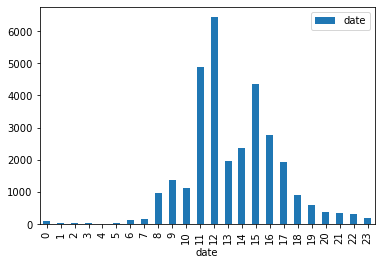

In [121]:
opened_mail_list = [] # based on the hour of EVENT.DATE
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open':
        opened_mail_list.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
df = pd.DataFrame(opened_mail_list, columns =['date'])
df.groupby(df["date"].dt.hour).count().plot(kind="bar")

In [122]:
open_mail_per_hour = list(df.groupby(df["date"].dt.hour).count()['date'])

In [126]:
sum(open_mail_per_hour)

31341

Il 20.55% degli utenti aprono le mail alle 12 circa

In [268]:
open_mail_per_hour[np.argmax(open_mail_per_hour)] / np.sum(open_mail_per_hour) * 100 # are all the NON DISTINCT opened mails

20.55454516448103

Il 15.58% degli utenti aprono le mail alle 11 circa

In [269]:
open_mail_per_hour[np.argsort(open_mail_per_hour)[-2]] / np.sum(open_mail_per_hour) * 100

15.583421077821383

Il 13.92% degli utenti aprono le mail alle 15 circa

In [270]:
open_mail_per_hour[np.argsort(open_mail_per_hour)[-3]] / np.sum(open_mail_per_hour) * 100

13.927443285153633

Periodo dove la gente si è disisscritta maggiormente

In [281]:
unsubscribed_list = []
for i in range(len(data)):
    if "nan" not in str(data["Data di disiscrizione"][i]):
        unsubscribed_list.append(pd.to_datetime(data["Data di disiscrizione"][i], format='%d/%m/%Y %H:%M'))

In [282]:
df = pd.DataFrame(unsubscribed_list, columns =['date'])

In [283]:
df["date"] = df["date"].astype("datetime64")

<AxesSubplot:xlabel='date,date'>

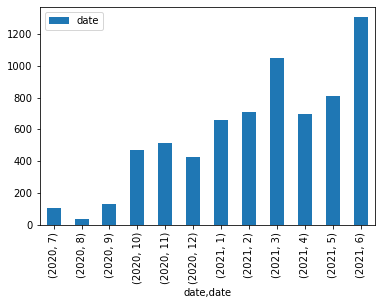

In [284]:
df.groupby([df["date"].dt.year, df["date"].dt.month]).count().plot(kind="bar")

In [29]:
df.groupby([df["date"].dt.year, df["date"].dt.month]).count()

date
date date      
2020 7      106
     8       34
     9      131
     10     470
     11     515
     12     426
2021 1      661
     2      707
     3     1052
     4      698
     5      808
     6     1305

In [ ]:
2020/11:1305
2020/10:1052
2021/03:808    

In [30]:
(1305+1052+808)/(106+34+131+470+515+426+661+707+1052+698+808+1305) * 100

45.7833068132504

Regione dove ci sono state più unsubscriptions

In [345]:
regions_list = data['MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION'].unique()
region_with_most_unsubs = regions_list[np.argmax(list(data.groupby(data['MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION']).count()['Data di disiscrizione']))]
number_of_unsubs = data.groupby(data['MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION']).count()['Data di disiscrizione'][np.argmax(list(data.groupby(data['MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION']).count()['Data di disiscrizione']))]
percentage = number_of_unsubs / np.sum(list(data.groupby(data['MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION']).count()['Data di disiscrizione'])) * 100
print("The region {} is the region with most unsubs, the % of unsubs wrt the total unsubs is {:.2f} %".format(region_with_most_unsubs, percentage))

The region Dhaka Division is the region with most unsubs, the % of unsubs wrt the total unsubs is 29.84 %


Regione più attiva (regione che ha aperto il maggior numbero di mail inviate)

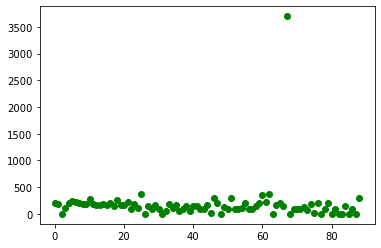

In [363]:
# % opened mails per MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION
import numpy as np

l4 = []
for i in data["MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION"].unique():
    if len(data.loc[(data["MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION"] == i) & (data["EVENT.TYPE"] == 'Sent')]) > 0:
        l4.append(len(data.loc[(data["MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION"] == i) & (data["EVENT.TYPE"] == 'Open')]) / len(data.loc[(data["MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION"] == i) & (data["EVENT.TYPE"] == 'Sent')]) * 100)

plt.plot(range(0, len(l4)), l4, 'go')
plt.show()

In [364]:
# top MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION
most_active_region = data["MESSAGE_STATISTICS.GEO_LOCAL_INFO_REGION"].unique()[np.argmax(l4)]

In [365]:
print("The region most active is {} with a % of opened mails wrt the total opened mails of {:.2f} %".format(most_active_region, np.max(l4) / len(data.loc[data["EVENT.TYPE"] == 'Open']) * 100))

The region most active is Pomerania with a % of opened mails wrt the total opened mails of 11.81 %


In [ ]:
l4.append(-np.max(l4))

In [370]:
print("The other regions have a % of opened mails on average of :".format(np.mean(l4) / len(data.loc[data["EVENT.TYPE"] == 'Open']) * 100))

The other regions have a % of opened mails on average of 0.44 %:


--------------------------------------

**L'ora dove l'azienda ha inviato più mails**

<AxesSubplot:xlabel='date'>

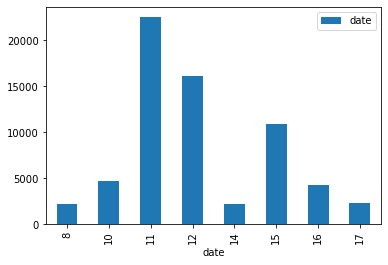

In [128]:
sent_mail_list = [] # based on the hour of EVENT.DATE
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent':
        sent_mail_list.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
df = pd.DataFrame(sent_mail_list, columns =['date'])
df.groupby(df["date"].dt.hour).count().plot(kind="bar")

In [131]:
sent_mail_per_hour = list(df.groupby(df["date"].dt.hour).count()['date'])

In [132]:
sum(sent_mail_per_hour)

64928

Il 34.65% delle mail sono state inviate dall'azienda ai clienti alle ore 11.

In [288]:
sent_mail_per_hour[np.argmax(sent_mail_per_hour)] / np.sum(sent_mail_per_hour) * 100

34.65685066535239

Il 24.85% delle mail sono state inviate dall'azienda ai clienti alle ore 12.

In [289]:
sent_mail_per_hour[np.argsort(sent_mail_per_hour)[-2]] / np.sum(sent_mail_per_hour) * 100

24.85830458353869

Il 16.68% delle mail sono state inviate dall'azienda ai clienti alle ore 15.

In [290]:
sent_mail_per_hour[np.argsort(sent_mail_per_hour)[-3]] / np.sum(sent_mail_per_hour) * 100

16.68463528831937

**Invii per fascia oraria (es. notte, mattina, pranzo, pomeriggio, cena, sera)**

In [93]:
df=df.assign(session=pd.cut(df["date"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

<AxesSubplot:>

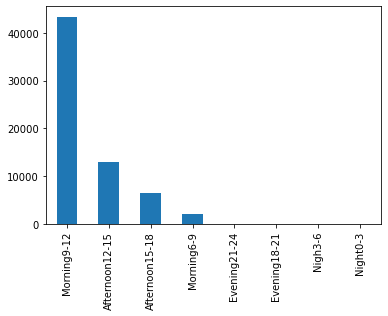

In [94]:
df['session'].value_counts().plot.bar()

In [66]:
df['session'].value_counts()[0] / df['session'].value_counts().sum() * 100

66.75702316412026

In [67]:
df['session'].value_counts()[1] / df['session'].value_counts().sum() * 100

19.966732380482995

In [68]:
df['session'].value_counts()[2] / df['session'].value_counts().sum() * 100

9.960263676688024

In [69]:
df['session'].value_counts()[3] / df['session'].value_counts().sum() * 100

3.3159807787087234

In [95]:
df['session'].value_counts()[4] / df['session'].value_counts().sum() * 100

0.0

In [96]:
df['session'].value_counts()[5] / df['session'].value_counts().sum() * 100

0.0

In [97]:
df['session'].value_counts()[6] / df['session'].value_counts().sum() * 100

0.0

In [98]:
df['session'].value_counts()[7] / df['session'].value_counts().sum() * 100

0.0

**Aperture mails per fascia oraria**

In [134]:
open_mail_list = [] # based on the hour of EVENT.DATE
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open':
        open_mail_list.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
df = pd.DataFrame(open_mail_list, columns =['date'])

In [135]:
df=df.assign(session=pd.cut(df["date"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

<AxesSubplot:>

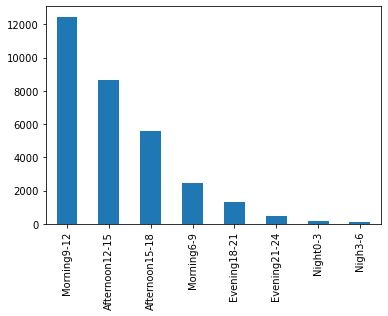

In [136]:
df['session'].value_counts().plot.bar()

In [295]:
df['session'].value_counts()[0] / df['session'].value_counts().sum() * 100

39.74665773268243

In [296]:
df['session'].value_counts()[1] / df['session'].value_counts().sum() * 100

27.695351137487634

In [297]:
df['session'].value_counts()[2] / df['session'].value_counts().sum() * 100

17.804154302670625

In [298]:
df['session'].value_counts()[3] / df['session'].value_counts().sum() * 100

7.906576050540826

In [299]:
df['session'].value_counts()[4] / df['session'].value_counts().sum() * 100

4.250023930314923

In [300]:
df['session'].value_counts()[5] / df['session'].value_counts().sum() * 100

1.5570658243195814

In [301]:
df['session'].value_counts()[6] / df['session'].value_counts().sum() * 100

0.5902811014326281

In [302]:
df['session'].value_counts()[7] / df['session'].value_counts().sum() * 100

0.44988992055135446

-------------------------------------------------------------------

**Numero di contatti distinti**

In [102]:
data["HashContatto"].nunique()

2942

**Numero di campagne distinte**

In [104]:
data['CAMPAIGN.CAMPAIGN_ID'].nunique()

3

**Numero di messaggi distinti**

In [105]:
data["HashMessaggio"].nunique()

64928

**Media messaggi inviati, aperti, cliccati per singolo contatto**

In [149]:
d = {}
for i in data["HashContatto"].unique():
    if i not in d:
        d[i] = {'Sent': 0, 'Open': 0, 'Click': 0}

In [150]:
list_contact_concatenated_mex  = []
for i in range(len(data)):
    if str(data["EVENT.TYPE"][i]) == 'Sent':
        d[data["HashContatto"][i]]['Sent'] += 1
    elif (str(data["EVENT.TYPE"][i]) == 'Open') and (data['HashContatto'][i] + data['HashMessaggio'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContatto'][i] + data['HashMessaggio'][i])
        d[data["HashContatto"][i]]['Open'] += 1
    elif str(data["EVENT.TYPE"][i]) == 'Click':
        d[data["HashContatto"][i]]['Click'] += 1
    else:
        pass

In [151]:
d['f22b4b39d49fb0a08320d7d6bb18637279018566f48dc4ae0bad68bf8a92a68a']

{'Sent': 29, 'Open': 28, 'Click': 13}

In [157]:
o = []
for key, value in d.items():
    o.append(value['Open'] / value['Sent'])

In [158]:
np.mean(o), np.std(o)

(0.2364853295205327, 0.2921420237565315)

**Numero medio di messaggi inviati per utente**

In [163]:
c2 = 0
o2 = 0
s2 = 0
for key, value in d.items():
    c2 += value['Click']
    o2 += value['Open']
    s2 += value['Sent']

In [167]:
(o2 / s2)

0.23208785115820602

**Numero di comunicazioni distinte**

In [5]:
data["COMUNICATION.COMUNICATION_NAME"].nunique(), data["COMUNICATION.SUBJECT"].nunique()

(26, 28)

**Distribuzione dei messaggi inviati distinti nelle comunicazioni (ie. quanti messaggi inviati distinti per ciascuna comunicazione)**

In [42]:
# Given 'day_of_week' and 'comm_name', this function returns the number of distinct messages for communication
# 'comm_name' sent in the day 'day_of_week'
def distribution_mex_for_comm_with_day(day_of_week=None, comm_name=None):
    counter_mex_comm_for_day = 0
    list_hash_mex = [] # this is needed for take the distinct communications
    if day_of_week is not None:
        for i in range(len(data)):
            if data["HashMessaggio"][i] not in list_hash_mex and data['EVENT.TYPE'][i] == 'Sent' and data['day_of_week'][i] == day_of_week and data["COMUNICATION.COMUNICATION_NAME"][i] == comm_name:
                list_hash_mex.append(data["HashMessaggio"][i])
                counter_mex_comm_for_day += 1

        return counter_mex_comm_for_day
    else:
        d3 = {}
        for i in data["COMUNICATION.COMUNICATION_NAME"].unique():
            if i not in d3:
                d3[i] = 0
        list_hash_mex = [] # this is needed for take the distinct communications
        for i in range(len(data)):
            if data["HashMessaggio"][i] not in list_hash_mex:
                list_hash_mex.append(data["HashMessaggio"][i])
                d3[data["COMUNICATION.COMUNICATION_NAME"][i]] += 1
        return list(d3.values())
    
def plot_distribution_mex_for_comm_with_day(out):
    if type(out) is list:
        plt.plot(range(0, len(out)), out, 'bo')
        plt.show()
    else:
        print(out)

In [43]:
data['day_of_week'].unique()

array(['Wednesday', 'Monday', 'Tuesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [110]:
out = distribution_mex_for_comm_with_day(day_of_week='Wednesday', comm_name=data["COMUNICATION.COMUNICATION_NAME"].unique()[24])
plot_distribution_mex_for_comm_with_day(out)

2549


In [51]:
out2 = distribution_mex_for_comm_with_day() # all

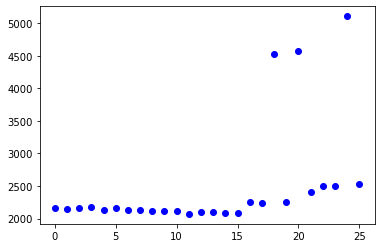

In [52]:
plot_distribution_mex_for_comm_with_day(out2)

**Distanza temporale media sent->open**

In [3]:
d4 = {}
for i in data["HashMessaggio"].unique():
    if i not in d4:
        d4[i] = {'Sent': 'null', 'Open': []}

In [4]:
for i in range(len(data)):
    if str(data["EVENT.TYPE"][i]) == 'Sent':
        d4[data["HashMessaggio"][i]]['Sent'] = pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M')
    elif str(data["EVENT.TYPE"][i]) == 'Open':
        d4[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
    else:
        pass

In [5]:
d4['638fc9f87168ed6312f74093610c48d0401d0989d8245f5574bcc21b26ad0bc6']

{'Sent': Timestamp('2020-07-06 10:38:35.722000'),
 'Open': [Timestamp('2021-02-17 13:03:29.952000'),
  Timestamp('2020-07-06 11:21:27.921000'),
  Timestamp('2020-07-06 11:21:28.464000')]}

In [6]:
# preserve the oldest 'Open' date and delete the others
for i in data["HashMessaggio"].unique():
    timestamp_open_list = d4[i]['Open']
    oldest = None
    for j in timestamp_open_list:
        if oldest is None:
            oldest = j
        elif j < oldest:
            oldest = j
    d4[i]['Open'] = oldest

In [7]:
# get differences between 'Open' and 'Sent'
list_deltas_open_minus_sent = []
for i in data["HashMessaggio"].unique():
    if d4[i]['Open'] is not None:
        list_deltas_open_minus_sent.append(d4[i]['Open'] - d4[i]['Sent'])

**Distanza tra Sent e Open per fascia oraria**. Grafico che dice "quanti messaggi di quelli inviati vengono aperti nella prima ora, quante nella seconda ecc. fino a 48+".

In [106]:
# get the mean of time elapsed between sent -> open mail
mean_sent_open = list_deltas_open_minus_sent[0]
for i in range(1, len(list_deltas_open_minus_sent)):
    mean_sent_open += list_deltas_open_minus_sent[i]
mean_sent_open / len(list_deltas_open_minus_sent)

Timedelta('1 days 00:13:54.540856062')

In [174]:
# get hours
hours_list = []
for i in range(len(list_deltas_open_minus_sent)):
    hours_list.append((list_deltas_open_minus_sent[i].days*24) + list_deltas_open_minus_sent[i].seconds//3600)

In [175]:
# all the number greater than 48 make it equal to 48
for i in range(len(hours_list)):
    if hours_list[i] > 48:
        hours_list[i] = 48

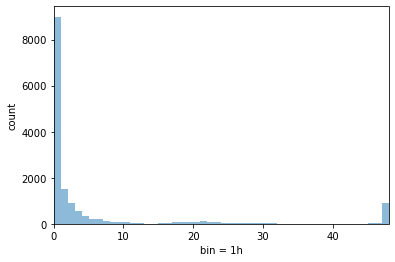

In [181]:
bins = 48
plt.xlim([0, 48])
plt.hist(hours_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

**Distanza temporale media open->click**

In [134]:
d5 = {}
for i in data["HashMessaggio"].unique():
    if i not in d5:
        d5[i] = {'Open': [], 'Click': []}
        
communication_name = data['COMUNICATION.COMUNICATION_NAME'].unique()[3]

In [135]:
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open':
        d5[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
    elif "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Click':
        d5[data["HashMessaggio"][i]]['Click'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
    else:
        pass

In [136]:
# delete record with 'Open' == null or 'Click' == []
d6 = {}
for k, v in d5.items():
    if (v['Click'] != []) and v['Open'] != []:
        d6[k] = {'Open':v['Open'], 'Click':v['Click']}
        

In [137]:
# preserve the oldest 'Click' date and delete the others
for i in data["HashMessaggio"].unique():
    if i in d6:
        timestamp_click_list = d6[i]['Click']
        oldest = None
        for j in timestamp_click_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d6[i]['Click'] = oldest
        # among the 'Open' timestamps, take the oldest
        timestamp_open_list = d6[i]['Open']
        oldest = None
        for j in timestamp_open_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d6[i]['Open'] = oldest

In [138]:
# get differences between 'Click' and 'Open'
list_deltas_click_minus_open = []
for i in data["HashMessaggio"].unique():
    if (i in d6):
        list_deltas_click_minus_open.append(d6[i]['Click'] - d6[i]['Open'])

**Distanza tra open e click per fascia oraria**.

In [139]:
# get hours
hours_list = []
for i in range(len(list_deltas_click_minus_open)):
    hours_list.append((list_deltas_click_minus_open[i].days*24) + list_deltas_click_minus_open[i].seconds//3600)

In [140]:
# all the number greater than 48 make it equal to 48
for i in range(len(hours_list)):
    if hours_list[i] > 48:
        hours_list[i] = 48
    if hours_list[i] < 0: # excluding click date < open date
        hours_list[i] = 0

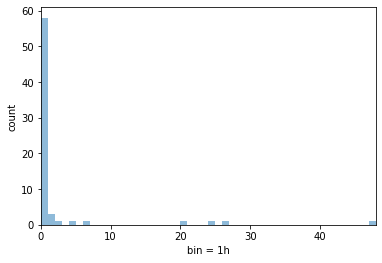

In [141]:
from matplotlib import pyplot as plt

bins = 48
plt.xlim([0, 48])
plt.hist(hours_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

In [190]:
# get the mean of time elapsed between sent -> open mail
mean_open_click = list_deltas_click_minus_open[0]
for i in range(1, len(list_deltas_click_minus_open)):
    mean_open_click += list_deltas_click_minus_open[i]
mean_open_click / len(list_deltas_click_minus_open)

Timedelta('0 days 14:40:25.203578125')

**Tassi di apertura per comunicazione/campagna per fascia oraria**. Significa che per ogni comunicazione/campagna devo mostrare quanti messaggi vengono aperti nella prima ora, poi seconda, ecc. fino a 48+.

In [27]:
from matplotlib import pyplot as plt
# TODO: adapt this function to the others
def apertura_per_fascia_oraria(name, comm_or_camp=None):
    d = {}
    for i in data["HashMessaggio"].unique():
        if i not in d:
            d[i] = {'Sent': 'null', 'Open': []}

    if name == 'all': # if is 'all' it does not matter the 'comm_or_camp'
        for i in range(len(data)):
            if str(data["EVENT.TYPE"][i]) == 'Sent':
                d[data["HashMessaggio"][i]]['Sent'] = pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M')
            elif str(data["EVENT.TYPE"][i]) == 'Open':
                d[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    elif comm_or_camp == 'communication':
        for i in range(len(data)):
            if str(data["EVENT.TYPE"][i]) == 'Sent' and data['COMUNICATION.COMUNICATION_NAME'][i] == name:
                d[data["HashMessaggio"][i]]['Sent'] = pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M')
            elif str(data["EVENT.TYPE"][i]) == 'Open' and data['COMUNICATION.COMUNICATION_NAME'][i] == name:
                d[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    elif comm_or_camp == 'campaign':
        for i in range(len(data)):
            if str(data["EVENT.TYPE"][i]) == 'Sent' and data['CAMPAIGN.CAMPAIGN_NAME'][i] == name:
                d[data["HashMessaggio"][i]]['Sent'] = pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M')
            elif str(data["EVENT.TYPE"][i]) == 'Open' and data['CAMPAIGN.CAMPAIGN_NAME'][i] == name:
                d[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    else:
        raise Exception(str(name) + " does not exists in "+ str(comm_or_camp))

    # preserve the oldest 'Open' date and delete the others
    for i in data["HashMessaggio"].unique():
        timestamp_open_list = d[i]['Open']
        oldest = None
        for j in timestamp_open_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d[i]['Open'] = oldest

    # get differences between 'Open' and 'Sent'
    list_deltas_open_minus_sent_comm = []
    for i in data["HashMessaggio"].unique():
        if d[i]['Open'] is not None:
            list_deltas_open_minus_sent_comm.append(d[i]['Open'] - d[i]['Sent'])

    # get hours
    hours_list = []
    for i in range(len(list_deltas_open_minus_sent_comm)):
        hours_list.append((list_deltas_open_minus_sent_comm[i].days*24) + list_deltas_open_minus_sent_comm[i].seconds//3600)

    # all the number greater than 48 make it equal to 48
    for i in range(len(hours_list)):
        if hours_list[i] > 48:
            hours_list[i] = 48

    return hours_list

**Tassi di click per comunicazione/campagna per fascia oraria**. Significa che per ogni comunicazione/campagna devo mostrare quanti messaggi vengono clickati nella prima ora, poi seconda, ecc. fino a 48+.

In [28]:
def click_per_fascia_oraria(name, comm_or_camp=None):
    d5 = {}
    for i in data["HashMessaggio"].unique():
        if i not in d5:
            d5[i] = {'Open': [], 'Click': []}
        
    if name == 'all':
        for i in range(len(data)):
            if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open':
                d5[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            elif "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Click':
                d5[data["HashMessaggio"][i]]['Click'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass

    elif comm_or_camp == 'communication':
        for i in range(len(data)):
            if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open' and data['COMUNICATION.COMUNICATION_NAME'][i] == name:
                d5[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            elif "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Click' and data['COMUNICATION.COMUNICATION_NAME'][i] == name:
                d5[data["HashMessaggio"][i]]['Click'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    elif comm_or_camp == 'campaign':
        for i in range(len(data)):
            if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open' and data['CAMPAIGN.CAMPAIGN_NAME'][i] == name:
                d5[data["HashMessaggio"][i]]['Open'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            elif "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Click' and data['CAMPAIGN.CAMPAIGN_NAME'][i] == name:
                d5[data["HashMessaggio"][i]]['Click'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    else:
        raise Exception(str(name) + " does not exists in "+ str(comm_or_camp))


    # delete record with 'Open' == null or 'Click' == []
    d6 = {}
    for k, v in d5.items():
        if (v['Click'] != []) and v['Open'] != []:
            d6[k] = {'Open':v['Open'], 'Click':v['Click']}


    # preserve the oldest 'Click' date and delete the others
    for i in data["HashMessaggio"].unique():
        if i in d6:
            timestamp_click_list = d6[i]['Click']
            oldest = None
            for j in timestamp_click_list:
                if oldest is None:
                    oldest = j
                elif j < oldest:
                    oldest = j
            d6[i]['Click'] = oldest
            # among the 'Open' timestamps, take the oldest
            timestamp_open_list = d6[i]['Open']
            oldest = None
            for j in timestamp_open_list:
                if oldest is None:
                    oldest = j
                elif j < oldest:
                    oldest = j
            d6[i]['Open'] = oldest

    # get differences between 'Click' and 'Open'
    list_deltas_click_minus_open = []
    for i in data["HashMessaggio"].unique():
        if (i in d6):
            list_deltas_click_minus_open.append(d6[i]['Click'] - d6[i]['Open'])
    
    # get hours
    hours_list = []
    for i in range(len(list_deltas_click_minus_open)):
        hours_list.append((list_deltas_click_minus_open[i].days*24) + list_deltas_click_minus_open[i].seconds//3600)

    # all the number greater than 48 make it equal to 48
    for i in range(len(hours_list)):
        if hours_list[i] > 48:
            hours_list[i] = 48
        if hours_list[i] < 0: # excluding click date < open date
            hours_list[i] = 0

    return hours_list

**Tassi di apertura per campagna per fascia oraria**.

In [154]:
data['CAMPAIGN.CAMPAIGN_NAME'].unique()

array(['tbd', 'Diennea', 'MagNews Comunicazioni 2021'], dtype=object)

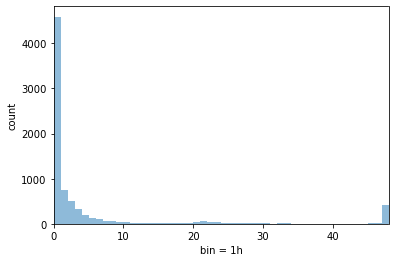

In [213]:
camp0_open = apertura_per_fascia_oraria(data['CAMPAIGN.CAMPAIGN_NAME'].unique()[0], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp0_open, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

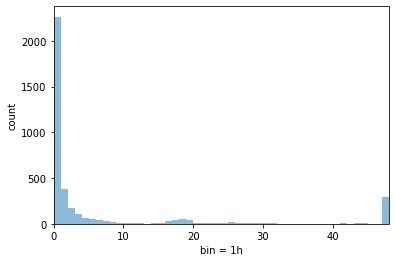

In [212]:
camp1_open = apertura_per_fascia_oraria(data['CAMPAIGN.CAMPAIGN_NAME'].unique()[1], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp1_open, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

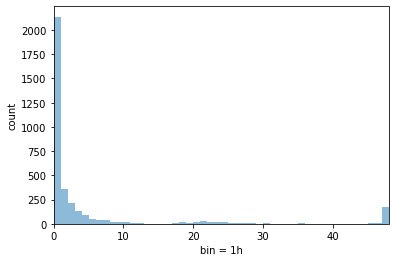

In [214]:
camp2_open = apertura_per_fascia_oraria(data['CAMPAIGN.CAMPAIGN_NAME'].unique()[2], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp2_open, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

**Tassi di click per campagna per fascia oraria**

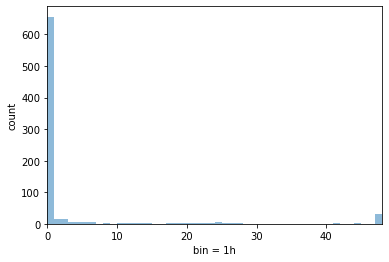

In [216]:
camp0_click = click_per_fascia_oraria(data['CAMPAIGN.CAMPAIGN_NAME'].unique()[0], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp0_click, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

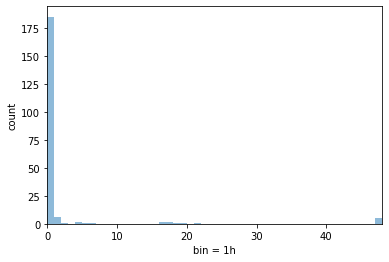

In [217]:
camp1_click = click_per_fascia_oraria(data['CAMPAIGN.CAMPAIGN_NAME'].unique()[1], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp1_click, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

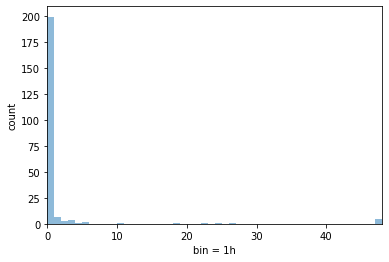

In [218]:
camp2_click = click_per_fascia_oraria(data['CAMPAIGN.CAMPAIGN_NAME'].unique()[2], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp2_click, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

**Quanti messaggi di quelli aperti vengono clickate nella prima ora, quante nella seconda ecc. fino a 24+**

In [199]:
# get hours
hours_list = []
for i in range(len(list_deltas_click_minus_open)):
    hours_list.append((list_deltas_click_minus_open[i].days*24) + list_deltas_click_minus_open[i].seconds//3600)

In [200]:
# all the number greater than 24 make it equal to 24
for i in range(len(hours_list)):
    if hours_list[i] > 24:
        hours_list[i] = 24
    if hours_list[i] < 0: # excluding click date < open date
        hours_list[i] = 0

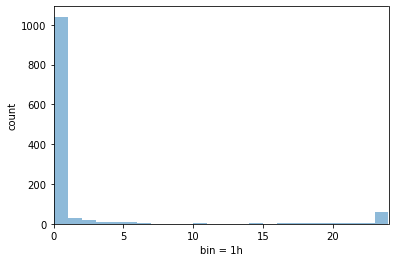

In [201]:
from matplotlib import pyplot as plt

bins = 24
plt.xlim([0, 24])
plt.hist(hours_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

**Lifetime medio dei contatti (es. tempo tra prima e ultima mail aperta per ogni contatto)**

In [34]:
d7 = {}
for i in data["HashContatto"].unique():
    if i not in d7:
        d7[i] = {'OpenOldest': [], 'OpenNewest': []}

In [35]:
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open':
        d7[data["HashContatto"][i]]['OpenOldest'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
        d7[data["HashContatto"][i]]['OpenNewest'].append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
    else:
        pass

In [36]:
# preserve the oldest 'Open' date and delete the others
for i in data["HashContatto"].unique():
    if i in d7:
        # keep the oldest
        timestamp_open_oldest_list = d7[i]['OpenOldest']
        oldest = None
        for j in timestamp_open_oldest_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d7[i]['OpenOldest'] = oldest
        # keep the newest
        timestamp_open_newest_list = d7[i]['OpenNewest']
        newest = None
        for j in timestamp_open_newest_list:
            if newest is None:
                newest = j
            elif j > newest:
                newest = j
        d7[i]['OpenNewest'] = newest

In [38]:
# get differences between 'OpenNewest' and 'OpenOldest'
list_deltas_opens_newest_minus_open_oldest = []
for i in data["HashContatto"].unique():
    if (i in d7) and (d7[i]['OpenNewest'] is not None) and (d7[i]['OpenOldest'] is not None):
        list_deltas_opens_newest_minus_open_oldest.append(d7[i]['OpenNewest'] - d7[i]['OpenOldest'])

In [39]:
# numero di contatti che hanno aperto almeno due mail, che quindi vengono presi in considerazione per il calolo
# del lifetime
len(list_deltas_opens_newest_minus_open_oldest)

1905

In [53]:
# get the mean of time elapsed between sent -> open mail
mean_open_newest_minus_open_oldest1 = list_deltas_opens_newest_minus_open_oldest[0]
for i in range(1, 472):
    mean_open_newest_minus_open_oldest1 += list_deltas_opens_newest_minus_open_oldest[i]
mean_open_newest_minus_open_oldest1 / 472

Timedelta('226 days 01:03:08.865046612')

In [54]:
# get the mean of time elapsed between sent -> open mail
mean_open_newest_minus_open_oldest2 = list_deltas_opens_newest_minus_open_oldest[472]
for i in range(472+1, 472*2):
    mean_open_newest_minus_open_oldest2 += list_deltas_opens_newest_minus_open_oldest[i]
mean_open_newest_minus_open_oldest2 / (472 - 1)

Timedelta('149 days 09:55:14.206857750')

In [55]:
# get the mean of time elapsed between sent -> open mail
mean_open_newest_minus_open_oldest3 = list_deltas_opens_newest_minus_open_oldest[472*2]
for i in range((472*2)+1, 472*3):
    mean_open_newest_minus_open_oldest3 += list_deltas_opens_newest_minus_open_oldest[i]
mean_open_newest_minus_open_oldest3 / (472-1)

Timedelta('218 days 16:11:03.361730360')

In [56]:
# get the mean of time elapsed between sent -> open mail
mean_open_newest_minus_open_oldest4 = list_deltas_opens_newest_minus_open_oldest[472*3]
for i in range((472*3)+1, 472*4):
    mean_open_newest_minus_open_oldest4 += list_deltas_opens_newest_minus_open_oldest[i]
mean_open_newest_minus_open_oldest4 / (472-1)

Timedelta('83 days 07:12:19.192142251')

In [57]:
# get the mean of time elapsed between sent -> open mail
mean_open_newest_minus_open_oldest5 = list_deltas_opens_newest_minus_open_oldest[472*4]
for i in range((472*4)+1, 1905):
    mean_open_newest_minus_open_oldest5 += list_deltas_opens_newest_minus_open_oldest[i]
mean_open_newest_minus_open_oldest5 / (1905-(472*4)-1)

Timedelta('4 days 08:38:43.159812500')

In [148]:
# this gives an overflow because the number is too big, I computed it by hand
# (mean_open_newest_minus_open_oldest1 + mean_open_newest_minus_open_oldest2 + mean_open_newest_minus_open_oldest3 + mean_open_newest_minus_open_oldest4 + mean_open_newest_minus_open_oldest5) / 5

**Quanti hanno un lifetime di 10gg, 20gg, 30gg ecc.**

In [82]:
# get days
days_list = []
for i in range(len(list_deltas_opens_newest_minus_open_oldest)):
    days_list.append(list_deltas_opens_newest_minus_open_oldest[i].days)

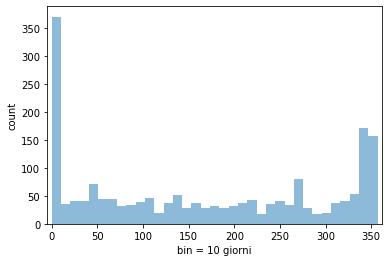

In [99]:
from matplotlib import pyplot as plt

bins = 35
plt.xlim([min(days_list)-5, max(days_list)+5])
plt.hist(days_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 10 giorni')
plt.ylabel('count')

plt.show()

**Fasce orarie in cui sono stati aperti i messaggi inviati dalle 6 alle 9**

<AxesSubplot:>

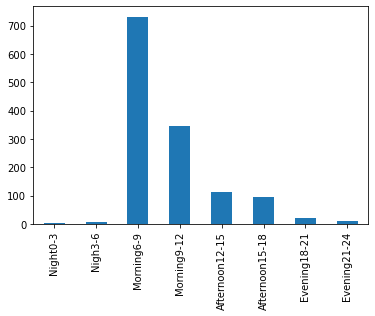

In [29]:
hash_messages_sent_mail_list_6_9 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent' and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) >= 6) and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) <= 9):
        hash_messages_sent_mail_list_6_9.append(data["HashMessaggio"][i])
        
dates_6_9 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and (str(data["EVENT.TYPE"][i]) == 'Open' or str(data["EVENT.TYPE"][i]) == 'Click') and (data["HashMessaggio"][i] in hash_messages_sent_mail_list_6_9):
        dates_6_9.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
        
df = pd.DataFrame(dates_6_9, columns =['dates_6_9'])
df=df.assign(session=pd.cut(df["dates_6_9"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))
df['session'].value_counts().sort_index().plot.bar()

In [30]:
df['session'].value_counts()[0] / df['session'].value_counts().sum() * 100

55.086661642803314

**Fasce orarie in cui sono stati aperti i messaggi inviati dalle 9 alle 12**

<AxesSubplot:>

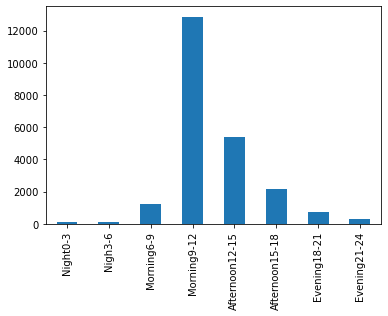

In [31]:
hash_messages_sent_mail_list_9_12 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent' and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) >= 9) and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) <= 12):
        hash_messages_sent_mail_list_9_12.append(data["HashMessaggio"][i])
        
dates_9_12 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and (str(data["EVENT.TYPE"][i]) == 'Open' or str(data["EVENT.TYPE"][i]) == 'Click') and (data["HashMessaggio"][i] in hash_messages_sent_mail_list_9_12):
        dates_9_12.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
        
df2 = pd.DataFrame(dates_9_12, columns =['dates_9_12'])

df2 = df2.assign(session2=pd.cut(df2["dates_9_12"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

df2['session2'].value_counts().sort_index().plot.bar()

In [32]:
df2['session2'].value_counts()[0] / df2['session2'].value_counts().sum() * 100

55.90691605045672

**Fasce orarie in cui sono stati aperti i messaggi inviati dalle 12 alle 15**

<AxesSubplot:>

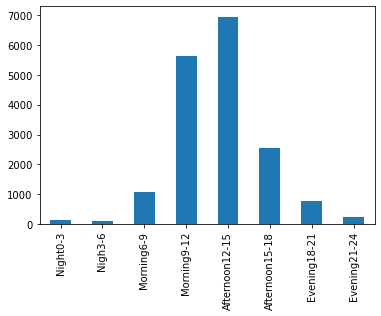

In [33]:
hash_messages_sent_mail_list_12_15 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent' and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) >= 12) and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) <= 15):
        hash_messages_sent_mail_list_12_15.append(data["HashMessaggio"][i])
        
dates_12_15 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and (str(data["EVENT.TYPE"][i]) == 'Open' or str(data["EVENT.TYPE"][i]) == 'Click') and (data["HashMessaggio"][i] in hash_messages_sent_mail_list_12_15):
        dates_12_15.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
        
df3 = pd.DataFrame(dates_12_15, columns =['dates_12_15'])

df3 = df3.assign(session3=pd.cut(df3["dates_12_15"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

df3['session3'].value_counts().sort_index().plot.bar()

In [34]:
df3['session3'].value_counts()[0] / df3['session3'].value_counts().sum() * 100

39.888640146949086

**Fasce orarie in cui sono stati aperti i messaggi inviati dalle 15 alle 18**

<AxesSubplot:>

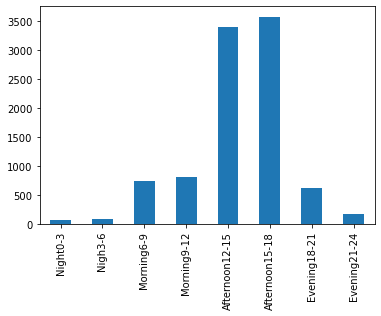

In [35]:
hash_messages_sent_mail_list_15_18 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent' and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) >= 15) and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) <= 18):
        hash_messages_sent_mail_list_15_18.append(data["HashMessaggio"][i])
        
dates_15_18 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and (str(data["EVENT.TYPE"][i]) == 'Open' or str(data["EVENT.TYPE"][i]) == 'Click') and (data["HashMessaggio"][i] in hash_messages_sent_mail_list_15_18):
        dates_15_18.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
        
df4 = pd.DataFrame(dates_15_18, columns =['dates_15_18'])

df4 = df4.assign(session4=pd.cut(df4["dates_15_18"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

df4['session4'].value_counts().sort_index().plot.bar()

In [33]:
df4['session4'].value_counts()[0] / df4['session4'].value_counts().sum() * 100

37.86078098471987

In [282]:
def fasce_orarie(first, second, day_of_week=None):
    hash_messages_sent_mail_list = []
    
    for i in range(len(data)):
        if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent' and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) >= first) and ((pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').hour) <= second):
            hash_messages_sent_mail_list.append(data["HashMessaggio"][i])
    dates = []
    if day_of_week is not None:
        for i in range(len(data)):
            if "nan" not in str(data["EVENT.DATE"][i]) and (str(data["EVENT.TYPE"][i]) == 'Open' or str(data["EVENT.TYPE"][i]) == 'Click') and data['day_of_week'][i] == day_of_week and (data["HashMessaggio"][i] in hash_messages_sent_mail_list):
                dates.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))
    else:
        for i in range(len(data)):
            if "nan" not in str(data["EVENT.DATE"][i]) and (str(data["EVENT.TYPE"][i]) == 'Open' or str(data["EVENT.TYPE"][i]) == 'Click') and (data["HashMessaggio"][i] in hash_messages_sent_mail_list):
                dates.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M'))

    df = pd.DataFrame(dates, columns =['dates'])

    df = df.assign(session=pd.cut(df["dates"].dt.hour,
                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
                                labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
                                include_lowest=True))

    return df['session'].value_counts().sort_index()
    

In [283]:
data['day_of_week'].unique()

array(['Wednesday', 'Monday', 'Tuesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

**Fasce orarie in cui sono stati aperti i messaggi inviati dalle 6 alle 9**

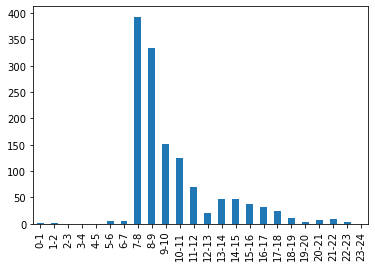

In [295]:
six_nine = fasce_orarie(6, 9) # all
six_nine.plot.bar();

**Messaggi aperti di Monday dei messaggi inviati dalle 6 alle 9.**

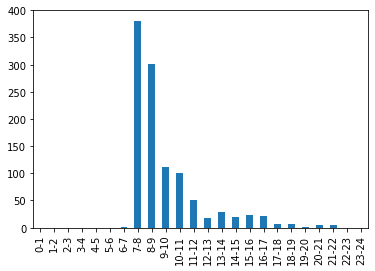

In [297]:
six_nine2 = fasce_orarie(6, 9, day_of_week='Monday')
six_nine2.plot.bar();

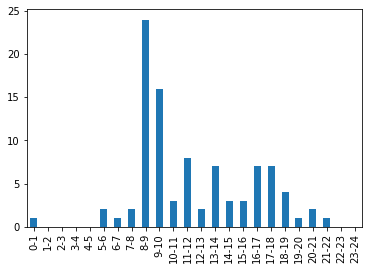

In [299]:
six_nine3 = fasce_orarie(6, 9, day_of_week='Tuesday')
six_nine3.plot.bar();

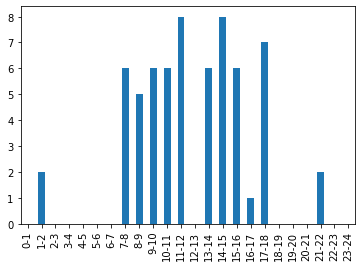

In [301]:
six_nine4 = fasce_orarie(6, 9, day_of_week='Wednesday')
six_nine4.plot.bar();

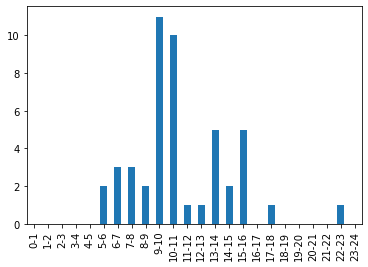

In [303]:
six_nine5 = fasce_orarie(6, 9, day_of_week='Thursday')
six_nine5.plot.bar();

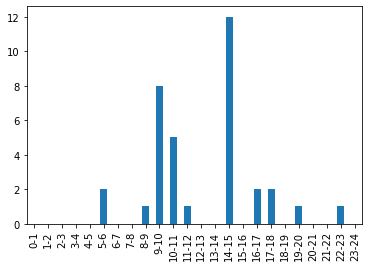

In [307]:
six_nine6 = fasce_orarie(6, 9, day_of_week='Friday')
six_nine6.plot.bar();

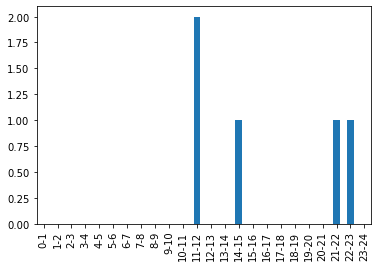

In [309]:
six_nine7 = fasce_orarie(6, 9, day_of_week='Saturday')
six_nine7.plot.bar();

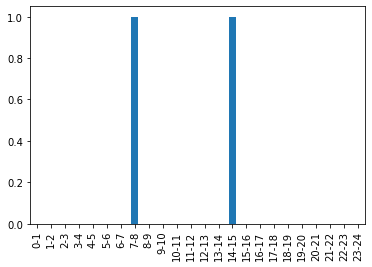

In [311]:
six_nine8 = fasce_orarie(6, 9, day_of_week='Sunday')
six_nine8.plot.bar();

From here onwards, I just computed fasce orarie in general.

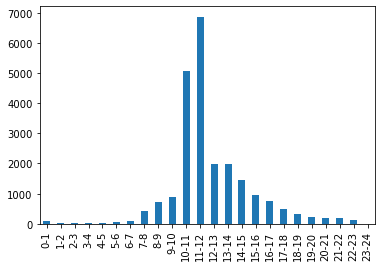

In [208]:
nine_twelve = fasce_orarie(9, 12)
nine_twelve.plot.bar();

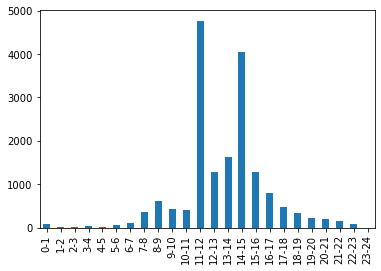

In [209]:
twelve_fifteen = fasce_orarie(12, 15)
twelve_fifteen.plot.bar();

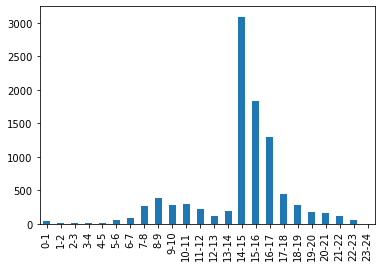

In [210]:
fifteen_eighteen = fasce_orarie(15, 18)
fifteen_eighteen.plot.bar();

**Calcolare il rapporto tra gli eventi Apertura distinti e il totale degli eventi Sent, per ciascuna Campagna distinta.**

In [222]:
dd = {}
for i in data["CAMPAIGN.CAMPAIGN_ID"].unique():
    if i not in dd:
        dd[i] = {'Sent': 0, 'Open': 0}

In [224]:
hash_mex_for_open_distinct = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open' and (data["HashMessaggio"][i] not in hash_mex_for_open_distinct):
        dd[data["CAMPAIGN.CAMPAIGN_ID"][i]]['Open'] += 1
        hash_mex_for_open_distinct.append(data["HashMessaggio"][i])
    elif "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent':
        dd[data["CAMPAIGN.CAMPAIGN_ID"][i]]['Sent'] += 1
    else:
        pass

In [238]:
list_percentage_open_divided_sent_per_campaign = []
for i in dd.values():
    list_percentage_open_divided_sent_per_campaign.append(i['Open'] / i['Sent']*100)

In [239]:
list_percentage_open_divided_sent_per_campaign

[25.08780409215402, 21.619919862621636, 21.348109358826036]

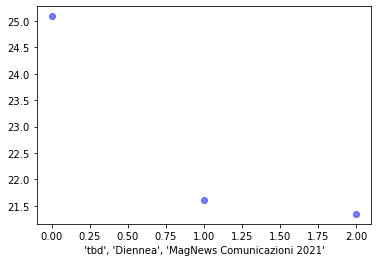

In [245]:
plt.plot(range(0, len(list_percentage_open_divided_sent_per_campaign)), list_percentage_open_divided_sent_per_campaign, 'bo', alpha=0.5)
plt.xlabel('\'tbd\', \'Diennea\', \'MagNews Comunicazioni 2021\'')
plt.show()

**Calcolare il rapporto tra gli eventi Apertura distinti e il totale degli eventi Sent, per ciascuna Comunicazione distinta.**

In [246]:
dm = {}
for i in data["COMUNICATION.COMUNICATION_NAME"].unique():
    if i not in dd:
        dm[i] = {'Sent': 0, 'Open': 0}

In [248]:
hash_mex_for_open_distinct2 = []
for i in range(len(data)):
    if "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Open' and (data["HashMessaggio"][i] not in hash_mex_for_open_distinct2):
        dm[data["COMUNICATION.COMUNICATION_NAME"][i]]['Open'] += 1
        hash_mex_for_open_distinct2.append(data["HashMessaggio"][i])
    elif "nan" not in str(data["EVENT.DATE"][i]) and str(data["EVENT.TYPE"][i]) == 'Sent':
        dm[data["COMUNICATION.COMUNICATION_NAME"][i]]['Sent'] += 1
    else:
        pass

In [250]:
list_percentage_open_divided_sent_per_comm = []
for i in dm.values():
    list_percentage_open_divided_sent_per_comm.append(i['Open'] / i['Sent']*100)

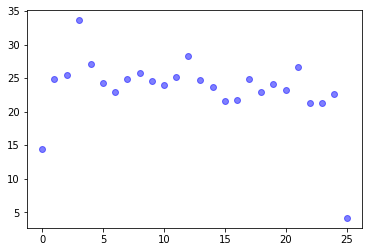

In [253]:
plt.plot(range(0, len(list_percentage_open_divided_sent_per_comm)), list_percentage_open_divided_sent_per_comm, 'bo', alpha=0.5)
plt.show()

**Lunedì -> x% ( con semantica: tra le mail inviate il Lunedì, l'x% delle inviate sono state Open/Clicked in futuro) <br>
Martedi -> y% (con semantica: ..)**

In [289]:
day_of_week = []
for i in range(len(data)):
    day_of_week.append(pd.to_datetime(data["EVENT.DATE"][i], format='%Y/%m/%d %H:%M').day_name())
data['day_of_week'] = pd.DataFrame(day_of_week)

In [296]:
d = {}
for i in data["day_of_week"].unique():
    if i not in d:
        d[i] = {'Sent': 0, 'Open': 0}

In [297]:
list_contact_concatenated_mex  = []
for i in range(len(data)):
    if str(data["EVENT.TYPE"][i]) == 'Sent':
        d[data["day_of_week"][i]]['Sent'] += 1
    elif (str(data["EVENT.TYPE"][i]) == 'Open') and (data['HashContatto'][i] + data['HashMessaggio'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContatto'][i] + data['HashMessaggio'][i])
        d[data["day_of_week"][i]]['Open'] += 1
    else:
        pass

In [300]:
list_percentage_open_divided_sent_per_comm = []
for i in d.values():
    if i['Sent'] > 0:
        list_percentage_open_divided_sent_per_comm.append(i['Open'] / i['Sent']*100)

In [335]:
names = ['','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [336]:
# Creating dataset
marks = np.array([23.4, 19.3, 21.4, 23.2, 0, 0, 0])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


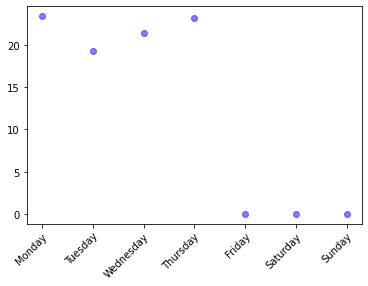

In [337]:
ax = plt.subplot(111)
ax.plot(range(0, len(marks)), marks, 'bo', alpha=0.5)
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right");

**Dei messaggi inviati nella campagna tbd nei giorni X, quali sono stati 
aperti/clickati in futuro? Ovvero, dei messaggi inviati di lunedì per la campagna X, quanti di questi in percentuale sono stati in futuro aperti/clickati?**

In [354]:
data["CAMPAIGN.CAMPAIGN_ID"].unique(),data["CAMPAIGN.CAMPAIGN_NAME"].unique() 

(array([25, 24, 28]),
 array(['tbd', 'Diennea', 'MagNews Comunicazioni 2021'], dtype=object))

In [366]:
d = {}
for i in data["day_of_week"].unique():
    if i not in d:
        d[i] = {'Sent': 0, 'Open': 0}

In [367]:
# change 28 with the id of other campaigns to do the stats for the other campaign
# TODO: make a function of this with "CAMPAIGN.CAMPAIGN_ID" as parameter
list_contact_concatenated_mex  = []
for i in range(len(data)):
    if str(data["EVENT.TYPE"][i]) == 'Sent' and data["CAMPAIGN.CAMPAIGN_ID"][i] == 28:
        d[data["day_of_week"][i]]['Sent'] += 1
    elif (str(data["EVENT.TYPE"][i]) == 'Open' and data["CAMPAIGN.CAMPAIGN_ID"][i] == 28) and (data['HashContatto'][i] + data['HashMessaggio'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContatto'][i] + data['HashMessaggio'][i])
        d[data["day_of_week"][i]]['Open'] += 1
    else:
        pass

In [368]:
list_percentage_open_divided_sent_per_comm = []
for i in d.values():
    if i['Sent'] > 0:
        list_percentage_open_divided_sent_per_comm.append(i['Open'] / i['Sent']*100)

In [369]:
d

{'Wednesday': {'Sent': 5049, 'Open': 1023},
 'Monday': {'Sent': 0, 'Open': 61},
 'Tuesday': {'Sent': 4593, 'Open': 877},
 'Thursday': {'Sent': 6781, 'Open': 1338},
 'Friday': {'Sent': 0, 'Open': 158},
 'Saturday': {'Sent': 0, 'Open': 30},
 'Sunday': {'Sent': 0, 'Open': 19}}

In [370]:
marks2 = [0, 877/4593*100, 1023/5049*100, 1338/6781*100, 0, 0, 0]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator


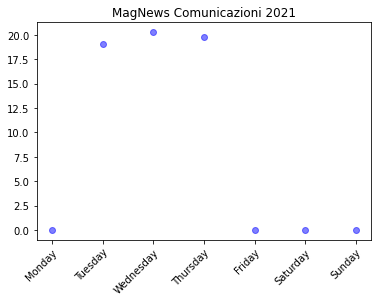

In [371]:
ax = plt.subplot(111)
ax.plot(range(0, len(marks2)), marks2, 'bo', alpha=0.5)
ax.title.set_text('MagNews Comunicazioni 2021')
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right");

NOTE: le mail inviate per ogni comunicazione vengono inviate tutte in giorni specifici. Function `distribution_mex_for_comm_with_day`. Ad esempio le mail della prima comunicazione vengono inviate tutte di Lunedì. Seconda Lunedì. Altre solo Mercoledì e Giovedì ad esempio. 